In [1]:
import networkx as nx
import random as rdm
import numpy as np
import math
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from random import choice
from random import seed
from random import sample

# Utilities
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline
from tikzplotlib import save as tikz_save
from tikzplotlib import get_tikz_code 

In [18]:
# enumerate small graphs based on edges
# 1 vertices
G_1_0 = nx.Graph()
G_1_0.add_nodes_from([1])

# 2 vertices
G_2_0 = nx.Graph()
G_2_0.add_nodes_from([1,2])
G_2_1 = nx.complement(G_2_0)
G_2 = [G_2_0, G_2_1]
G_2_edgeindex = [0, 1]

# 3 vertices
G_3_0 = nx.Graph()
G_3_0.add_nodes_from([1,2,3])
G_3_1 = nx.Graph()
G_3_1.add_nodes_from([1,2,3])
G_3_1.add_edge(1,2)
G_3_2 = nx.complement(G_3_1)
G_3_3 = nx.complement(G_3_0)
G_3 = [G_3_0, G_3_1, G_3_2, G_3_3]
G_3_edgeindex = [0, 1, 2, 3]

# 4 vertices
G_4_0 = nx.Graph()
G_4_0.add_nodes_from([1,2,3,4])
G_4_1 = nx.Graph()
G_4_1.add_nodes_from([1,2,3,4])
G_4_1.add_edge(1,2)
G_4_2 = nx.Graph()
G_4_2.add_nodes_from([1,2,3,4])
G_4_2.add_edges_from([(1,2), (2,3)])
G_4_3 = nx.Graph()
G_4_3.add_nodes_from([1,2,3,4])
G_4_3.add_edges_from([(1,2), (3,4)])
G_4_4 = nx.Graph()
G_4_4.add_edges_from([(1,2), (1,3), (1,4)])
G_4_5 = nx.Graph()
G_4_5.add_edges_from([(1,2), (2,3), (3,4)])
G_4_6 = nx.complement(G_4_4)
G_4_7 = nx.complement(G_4_3)
G_4_8 = nx.complement(G_4_2)
G_4_9 = nx.complement(G_4_1)
G_4_10 = nx.complement(G_4_0)
G_4 = [G_4_0, G_4_1, G_4_2, G_4_3, G_4_4, G_4_5, G_4_6, G_4_7, G_4_8, G_4_9, G_4_10]
G_4_edgeindex = [0, 1, 2, 4, 7, 9, 10]

# 5 vertices
G_5_0 = nx.Graph()
G_5_0.add_nodes_from([1,2,3,4,5])
G_5_1 = nx.Graph()
G_5_1.add_nodes_from([1,2,3,4,5])
G_5_1.add_edge(1,2)
G_5_2 = nx.Graph()
G_5_2.add_nodes_from([1,2,3,4,5])
G_5_2.add_edges_from([(1,2), (2,3)])
G_5_3 = nx.Graph()
G_5_3.add_nodes_from([1,2,3,4,5])
G_5_3.add_edges_from([(1,2), (3,4)])
G_5_4 = nx.Graph()
G_5_4.add_nodes_from([1,2,3,4,5])
G_5_4.add_edges_from([(1,2), (1,3), (1,4)])
G_5_5 = nx.Graph()
G_5_5.add_nodes_from([1,2,3,4,5])
G_5_5.add_edges_from([(1,2), (2,3), (4,5)])
G_5_6 = nx.Graph()
G_5_6.add_nodes_from([1,2,3,4,5])
G_5_6.add_edges_from([(1,2), (2,3), (3,4)])
G_5_7 = nx.Graph()
G_5_7.add_nodes_from([1,2,3,4,5])
G_5_7.add_edges_from([(1,2), (2,3), (3,1)])
G_5_8 = nx.Graph()
G_5_8.add_edges_from([(1,2), (1,3), (1,4), (1,5)])
G_5_9 = nx.Graph()
G_5_9.add_nodes_from([1,2,3,4,5])
G_5_9.add_edges_from([(1,2), (2,3), (3,4), (4,1)])
G_5_10 = nx.Graph()
G_5_10.add_edges_from([(1,2), (1,3), (1,4), (4,5)])
G_5_11 = nx.Graph()
G_5_11.add_nodes_from([1,2,3,4,5])
G_5_11.add_edges_from([(1,2), (1,3), (1,4), (3,4)])
G_5_12 = nx.Graph()
G_5_12.add_edges_from([(1,2), (2,3), (3,4), (4,5)])
G_5_13 = nx.Graph()
G_5_13.add_edges_from([(1,2), (2,3), (3,1), (4,5)])
G_5_14 = nx.Graph()
G_5_14.add_edges_from([(1,2), (2,3), (3,4), (4,1), (1,5)])
G_5_15 = nx.Graph()
G_5_15.add_edges_from([(1,2), (2,3), (3,1), (4,1), (3,5)])
G_5_16 = nx.Graph()
G_5_16.add_edges_from([(1,2), (2,3), (3,1), (4,1), (1,5)])
G_5_17 = nx.Graph()
G_5_17.add_edges_from([(1,2), (2,3), (3,4), (4,5), (1,5)])
G_5_18 = nx.complement(G_5_16)
G_5_19 = nx.complement(G_5_14)
G_5_20 = nx.complement(G_5_13)
G_5_21 = nx.complement(G_5_12)
G_5_22 = nx.complement(G_5_11)
G_5_23 = nx.complement(G_5_10)
G_5_24 = nx.complement(G_5_9)
G_5_25 = nx.complement(G_5_8)
G_5_26 = nx.complement(G_5_7)
G_5_27 = nx.complement(G_5_6)
G_5_28 = nx.complement(G_5_5)
G_5_29 = nx.complement(G_5_4)
G_5_30 = nx.complement(G_5_3)
G_5_31 = nx.complement(G_5_2)
G_5_32 = nx.complement(G_5_1)
G_5_33 = nx.complement(G_5_0)
G_5 = [G_5_0, G_5_1, G_5_2, G_5_3, G_5_4, G_5_5, G_5_6, G_5_7, G_5_8, G_5_9, G_5_10,
      G_5_11, G_5_12, G_5_13, G_5_14, G_5_15, G_5_16, G_5_17, G_5_18, G_5_19, G_5_20,
      G_5_21, G_5_22, G_5_23, G_5_24, G_5_25, G_5_26, G_5_27, G_5_28, G_5_29, G_5_30,
      G_5_31, G_5_32, G_5_33]
G_5_edgeindex = [0, 1, 2, 4, 8, 14, 20, 26, 30, 32, 33]

G_set = [G_1_0] + G_2 + G_3 + G_4

LOAD DATA

In [3]:
# random walk with restart sampling
def random_walk_with_restart_sampling(und_graph, sample_percentage, restart_prob, jump_iteration = 100, sd = None):
    # set random seed
    seed(sd)
    
    # sample size round down to interger
    sample_size = int(nx.number_of_nodes(und_graph) * sample_percentage)
    
    # set starting node
    startnode = rdm.sample(und_graph.nodes(),1)[0]
    currentnode = startnode
    
    # used for jump when no new node visited in certain iteration
    restart_iteration = 0 
    last_number_of_nodes = 0
    
    # result node set and total iteration
    nodelist = set()
    total_iteration = 0
    
    while len(nodelist) < sample_size:
        # add current node
        total_iteration += 1
        
        
        nodelist.add(currentnode)
        
        # restart with certain prob
        x = rdm.random()
        if x < restart_prob:
            currentnode = startnode
        else:    
            # move a step forward
            nextnode = rdm.sample(list(und_graph[currentnode]),1)[0]
            currentnode = nextnode
        
        # find a new startnode if number of nodes in sample does not grow
        if restart_iteration < jump_iteration:
            restart_iteration += 1
        else:
            if last_number_of_nodes == len(nodelist):
                startnode = rdm.sample(und_graph.nodes(),1)[0]
                currentnode = startnode
            restart_iteration = 0
            last_number_of_nodes = len(nodelist)
    return und_graph.subgraph(nodelist) #,total_iteration

In [4]:
# pre-processing
def load_data_facebook(path):
    initial_edges = []
    timed_edges = []
    edge_index = {}
    with open(path) as f:
        lines = f.readlines()
        for line in lines:
            edge = line.strip().split()
            #edge = line.strip().split(',')
            if edge[2] == '\\N':
                initial_edges.append([edge[2], edge[0], edge[1]])
                edge_index[(edge[0], edge[1])] = 0
                edge_index[(edge[1], edge[0])] = 0
            else:
                timed_edges.append([edge[2], edge[0], edge[1]])
                edge_index[(edge[0], edge[1])] = edge[2]
                edge_index[(edge[1], edge[0])] = edge[2]
                
    sorted_edges = initial_edges + sorted(timed_edges)
    
    G = nx.Graph()
    for e in sorted_edges:
        G.add_edge(e[1], e[2])
    print(nx.number_of_nodes(G), nx.number_of_edges(G))
    G_sub = random_walk_with_restart_sampling(G, 0.0015, 0.15, sd=2)
    print("subgraph done")
    print(nx.number_of_nodes(G_sub), nx.number_of_edges(G_sub))
    
    sub_sorted_edges = []
    for e in G_sub.edges():
        sub_sorted_edges.append([str(edge_index[e]), e[0], e[1]])

    return sorted(sub_sorted_edges), G_sub

def split_data(sorted_edges, training_precentage):
    size = len(sorted_edges)
    return sorted_edges[:int(size * training_precentage)], sorted_edges[int(size * training_precentage):]

def prepare_graph(train, test):
    G_train = nx.Graph()
    for e in train:
        G_train.add_edge(e[1], e[2])
    
    G_test = nx.Graph()
    for e in test:
        if e[1] in G_train.nodes() and e[2] in G_train.nodes():
            G_test.add_edge(e[1], e[2])
    
    return G_train, G_test

In [5]:
def load_data_bitcoin(path):
    initial_edges = []
    timed_edges = []
    with open(path) as f:
        lines = f.readlines()
        for line in lines:
            #edge = line.strip().split()
            edge = line.strip().split(',')
            if edge[2] == '\\N':
                initial_edges.append([edge[2], edge[0], edge[1]])
            else:
                timed_edges.append([edge[2], edge[0], edge[1]])
                
    return initial_edges + sorted(timed_edges)

In [6]:
# return neighbors of neighbors of a node
def neighbors_neighbor(G, node):
    neighbors_neighbor = set()
    for n in G[node]:
        for nn in G[n]:
            neighbors_neighbor.add(nn)
    return neighbors_neighbor

In [7]:
sorted_edges, G_sssss = load_data_facebook("dataset/youtube-growth-sorted.txt")

3223643 9388083
subgraph done
4835 63471


In [8]:
train, test = split_data(sorted_edges, 0.9)
train_train, train_validation = split_data(train, 0.75)
G_train, G_test = prepare_graph(train, test)
G_train_train, G_train_validation = prepare_graph(train_train, train_validation)

In [9]:
print(nx.number_of_nodes(G_train), nx.number_of_edges(G_train))

4653 57123


In [10]:
print(nx.number_of_nodes(G_train_train), nx.number_of_edges(G_train_train))

4204 42842


Naive Similarity

In [11]:
# similarity function
# sim(u,v) = α|N(u) ∩ N(v)|/2 + (1-α)∑γ^dist(i,j)/(|N(u) ∩ N(v)|-1)
# α in [0,1], γ in (0,1)
def naive_decay_similarity(CN_graph):
    nodes = nx.number_of_nodes(CN_graph)
    sim_score = 0
    all_shortest_path_length = dict(nx.all_pairs_shortest_path_length(CN_graph))
    if nodes != 1:
        for i in all_shortest_path_length.keys():
            for j in all_shortest_path_length[i].keys():
                if i < j:
                    sim_score += (1/all_shortest_path_length[i][j])/(nodes-1)
    return sim_score

Model with Parameter Learning

In [12]:
# similarity function
# sim(u,v) = α|N(u) ∩ N(v)|/2 + (1-α)∑γ^dist(i,j)/(|N(u) ∩ N(v)|-1)
# α in [0,1], γ in (0,1)
def gamma_decay_similarity(CN_graph, alpha, gamma):
    nodes = nx.number_of_nodes(CN_graph)
    sim_score = nodes * alpha / 2
    all_shortest_path_length = dict(nx.all_pairs_shortest_path_length(CN_graph))
    if nodes != 1:
        for i in all_shortest_path_length.keys():
            for j in all_shortest_path_length[i].keys():
                if i < j:
                    sim_score += (1-alpha) * (gamma ** all_shortest_path_length[i][j])/(nodes-1)
    return sim_score

In [13]:
def multi_gamma_decay_similarity(CN_graphs, alpha, gamma):
    results = []
    for g in CN_graphs:
        results.append(gamma_decay_similarity(g, alpha, gamma))
    return results

In [14]:
def learning_scalar(actual, observe):
    xiyi = 0
    xi_2 = 0
    for i in range(len(actual)):
        xiyi += actual[i] * observe[i]
        xi_2 += actual[i] * actual[i]
    return xiyi/xi_2

In [15]:
def square_error(actual, observe):
    scalar = learning_scalar(actual, observe)
    error = 0
    for i in range(len(actual)):
        error += (actual[i] - observe[i]/scalar) ** 2
    return error

In [16]:
def grid_search(G_set, actual, alpha_range, gamma_range):
    results = []
    for alpha in alpha_range:
        for gamma in gamma_range:
            observe = multi_gamma_decay_similarity(G_set, alpha, gamma)
            error = square_error(actual, observe)
            results.append((error, alpha, gamma))
    return sorted(results)

In [19]:
# count case 1-4 happening using real-data
common1 = [0]
common1_appear = [0]
common2 = [0] * 2
common2_appear = [0] * 2
common3 = [0] * 4
common3_appear = [0] * 4
common4 = [0] * 11
common4_appear = [0] * 11

iteration = 0
for n1 in G_train_train.nodes():
    iteration += 1
    print(iteration)
    
    nn = neighbors_neighbor(G_train_train, n1)
    for n2 in nn:
        if (n1 != n2) and ((n1, n2) not in G_train_train.edges()):
            cn = list(nx.common_neighbors(G_train_train, n1, n2))
            if len(cn) == 1:
                common1[0] += 1
                if (n1, n2) in G_train_validation.edges():
                    common1_appear[0] += 1
            elif len(cn) == 2:
                g_sub = G_train_train.subgraph(cn)
                index = nx.number_of_edges(g_sub)
                common2[index] += 1
                if (n1, n2) in G_train_validation.edges():
                    common2_appear[index] += 1
            elif len(cn) == 3:
                g_sub = G_train_train.subgraph(cn)
                index = nx.number_of_edges(g_sub)
                common3[index] += 1
                if (n1, n2) in G_train_validation.edges():
                    common3_appear[index] += 1
            elif len(cn) == 4:
                g_sub = G_train_train.subgraph(cn)
                index = G_4_edgeindex[nx.number_of_edges(g_sub)]
                while(nx.is_isomorphic(g_sub, G_4[index]) == False):
                    index += 1
                common4[index] += 1
                if (n1, n2) in G_train_validation.edges():
                    common4_appear[index] += 1
                    

1
2


IndexError: list index out of range

In [30]:
print(common1, common1_appear, common2, common2_appear, common3, common3_appear, common4, common4_appear)

# 1 to 3 common neighbors results
result_1 = [common1_appear[i] / common1[i] for i in range(len(common1_appear))] 
result_2 = [common2_appear[i] / common2[i] for i in range(len(common2_appear))] 
result_3 = [common3_appear[i] / common3[i] for i in range(len(common3_appear))] 
result_4 = [common4_appear[i] / common4[i] for i in range(len(common4_appear))] 
actual = result_1 + result_2 + result_3 + result_4

[862998] [1898] [142507, 376391] [539, 791] [20284, 67784, 117765, 155991] [123, 322, 349, 352] [2974, 10414, 20841, 2684, 12458, 15630, 16202, 4312, 56766, 68774, 59361] [29, 68, 119, 16, 64, 89, 75, 22, 205, 213, 135]


In [38]:
grid_search(G_set, actual, [0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.9, 1], [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.5,  0.7, 0.9])

[(5.741898634793235e-05, 1, 0.0001),
 (5.741898634793235e-05, 1, 0.001),
 (5.741898634793235e-05, 1, 0.005),
 (5.741898634793235e-05, 1, 0.01),
 (5.741898634793235e-05, 1, 0.05),
 (5.741898634793235e-05, 1, 0.1),
 (5.741898634793235e-05, 1, 0.2),
 (5.741898634793235e-05, 1, 0.5),
 (5.741898634793235e-05, 1, 0.7),
 (5.741898634793235e-05, 1, 0.9),
 (5.742012281177628e-05, 0.9, 0.0001),
 (5.742580517168696e-05, 0.6, 0.0001),
 (5.742921462017894e-05, 0.5, 0.0001),
 (5.743035260055833e-05, 0.9, 0.001),
 (5.7434328838669733e-05, 0.4, 0.0001),
 (5.744285265811702e-05, 0.3, 0.0001),
 (5.745990075406375e-05, 0.2, 0.0001),
 (5.7475853462269296e-05, 0.9, 0.005),
 (5.7487187924675035e-05, 0.6, 0.001),
 (5.751104869218932e-05, 0.1, 0.0001),
 (5.7521292360663043e-05, 0.5, 0.001),
 (5.753281011516546e-05, 0.9, 0.01),
 (5.75724535588423e-05, 0.4, 0.001),
 (5.7613360933467927e-05, 0.05, 0.0001),
 (5.7657734295007117e-05, 0.3, 0.001),
 (5.776028965899657e-05, 0.6, 0.005),
 (5.782834073411163e-05, 0.2, 

Prepare testing set

In [20]:
# generate candidates at random
def random_candidates(G_train, G_test, sd = None):
    candidates = list(G_test.edges())
    size = 2*len(candidates)
    seed(sd)
    while len(candidates) < size:
        n1 = choice(list(G_test.nodes))
        n2 = choice(list(G_test.nodes))
        if (n1 != n2) and ((n1, n2) not in G_train.edges()) and ((n1, n2) not in G_test.edges()):
            candidates.append((n1, n2))
    return candidates

# generate candidates more than one common neighbors
def have_cn_candidates(G_train, G_test, sd = None):
    candidates = list(G_test.edges())
    size = 2*len(candidates)
    seed(sd)
    while len(candidates) < size:
        n1 = choice(list(G_test.nodes))
        nn = neighbors_neighbor(G_train, n1)
        n2 = choice(list(nn))
        if (n1 != n2) and ((n1, n2) not in G_train.edges()) and ((n1, n2) not in G_test.edges()):
            candidates.append((n1, n2))
    return candidates

# generate candidates more than one common neighbors
def have_cn2_candidates(G_train, G_test, sd = None):
    candidates = list(G_test.edges())
    size = 2*len(candidates)
    seed(sd)
    while len(candidates) < size:
        n1 = choice(list(G_test.nodes))
        nn = neighbors_neighbor(G_train, n1)
        n2 = choice(list(nn))
        if (n1 != n2) and ((n1, n2) not in G_train.edges()) and ((n1, n2) not in G_test.edges()) and (len(list(nx.common_neighbors(G_train, n1, n2)))>1):
            candidates.append((n1, n2))
    return candidates

# generate candidates distances less than 3
def less_3_candidates(G_train, G_test, sd = None):
    candidates = list(G_test.edges())
    size = 2*len(candidates)
    seed(sd)
    while len(candidates) < size:
        n1 = choice(list(G_test.nodes))
        currentnode = n1
        for i in range(3):
            nextnode = sample(list(G_train[currentnode]),1)[0]
            currentnode = nextnode
        n2 = currentnode
        if (n1 != n2) and ((n1, n2) not in G_train.edges()) and ((n1, n2) not in G_test.edges()):
            candidates.append((n1, n2))
    return candidates

In [40]:
#candidates = have_cn_candidates(G_train, G_test, sd = 1)
#candidates = have_cn2_candidates(G_train, G_test, sd = 1)
#candidates = random_candidates(G_train, G_test, sd = 1)
candidates = less_3_candidates(G_train, G_test, sd = 1)

In [41]:
len(candidates)

10944

Link Prediction

In [24]:
# common_neighbor
def common_neighbor(G_train, edge_list):
    y_score = []
    for l in edge_list:
        y_score.append(len(list(nx.common_neighbors(G_train, l[0], l[1]))))
    return y_score

In [25]:
# Adamic Adar
def adamic_adar(G_train, edge_list):
    y_score = [c for (a,b,c) in list(nx.adamic_adar_index(G_train, ebunch=edge_list))]
    return y_score

In [26]:
# resource_allocation_index
def resource_allocation(G_train, edge_list):
    y_score = [c for (a,b,c) in list(nx.resource_allocation_index(G_train, ebunch=edge_list))]
    return y_score

In [27]:
# jaccard_coefficient
def jaccard(G_train, edge_list):
    y_score = [c for (a,b,c) in list(nx.jaccard_coefficient(G_train, ebunch=edge_list))]
    return y_score

In [28]:
# preferential_attachment
def preferential_attach(G_train, edge_list):
    y_score = [c for (a,b,c) in list(nx.preferential_attachment(G_train, ebunch=edge_list))]
    return y_score

In [32]:
# Katz
def katz_index(G_train, edge_list, beta = 0.0005):
    y_score = []
    for l in edge_list:
        paths = list(nx.all_simple_paths(G_train, l[0], l[1], cutoff = 3))
        sc = 0
        for p in paths:
            sc += beta**(len(p)-1)
        y_score.append(sc)
    return y_score

In [30]:
# Naive CNS
def naive_CNS(G_train, edge_list):
    y_score = []
    for l in edge_list:
        cn = list(nx.common_neighbors(G_train, l[0], l[1]))
        cn_graph = G_train.subgraph(cn)
        y_score.append(naive_decay_similarity(cn_graph))
    return y_score

In [31]:
# Complete CNS
def complete_CNS(G_train, edge_list, alpha, gamma):
    y_score = []
    for l in edge_list:
        cn = list(nx.common_neighbors(G_train, l[0], l[1]))
        cn_graph = G_train.subgraph(cn)
        y_score.append(gamma_decay_similarity(cn_graph, alpha, gamma))
    return y_score

In [42]:
#put it togather
y_test = []
for l in candidates:
    if l in G_test.edges():
        y_test.append(1)
    else:
        y_test.append(0)
        
cn_score = common_neighbor(G_train, candidates)
cn_fpr, cn_tpr, _ = roc_curve(y_test, cn_score)
cn_roc_auc = auc(cn_fpr, cn_tpr)
print("CN done", cn_roc_auc)

aa_score = adamic_adar(G_train, candidates)
aa_fpr, aa_tpr, _ = roc_curve(y_test, aa_score)
aa_roc_auc = auc(aa_fpr, aa_tpr)
print("AA done", aa_roc_auc)

ra_score = resource_allocation(G_train, candidates)
ra_fpr, ra_tpr, _ = roc_curve(y_test, ra_score)
ra_roc_auc = auc(ra_fpr, ra_tpr)
print("RA done", ra_roc_auc)

j_score = jaccard(G_train, candidates)
j_fpr, j_tpr, _ = roc_curve(y_test, j_score)
j_roc_auc = auc(j_fpr, j_tpr)
print("J done", j_roc_auc)

pa_score = preferential_attach(G_train, candidates)
pa_fpr, pa_tpr, _ = roc_curve(y_test, pa_score)
pa_roc_auc = auc(pa_fpr, pa_tpr)
print("PA done", pa_roc_auc)

katz_score = katz_index(G_train, candidates)
katz_fpr, katz_tpr, _ = roc_curve(y_test, katz_score)
katz_roc_auc = auc(katz_fpr, katz_tpr)
print("KATZ done", katz_roc_auc)

naive_CNS_score = naive_CNS(G_train, candidates)
naive_fpr, naive_tpr, _ = roc_curve(y_test, naive_CNS_score)
naive_roc_auc = auc(naive_fpr, naive_tpr)
print("naive done", naive_roc_auc)

complete_CNS_score = complete_CNS(G_train, candidates, 0.1, 0.5)
complete_fpr, complete_tpr, _ = roc_curve(y_test, complete_CNS_score)
complete_roc_auc = auc(complete_fpr, complete_tpr)
print("complete done", complete_roc_auc)

CN done 0.6114988673063934
AA done 0.6162917249110837
RA done 0.623007583396387
J done 0.576372591139154
PA done 0.6321714440447488
KATZ done 0.6192612717641754
naive done 0.6080978642466912
complete done 0.6119090162090471


In [69]:
# abondon since not normalized
'''
# scoring functions based on structure
def reverse_shortest_path(graph):
    all_shortest_path_length = dict(nx.all_pairs_shortest_path_length(graph))
    reverse_sum = 0
    for i in all_shortest_path_length.keys():
        for j in all_shortest_path_length[i].keys():
            if i < j:
                reverse_sum += 1/(all_shortest_path_length[i][j]+2)
    return reverse_sum

# scoring functions based on structure
def reverse_shortest_path_log(graph):
    all_shortest_path_length = dict(nx.all_pairs_shortest_path_length(graph))
    print(all_shortest_path_length)
    reverse_sum = 0
    for i in all_shortest_path_length.keys():
        for j in all_shortest_path_length[i].keys():
            if i < j:
                reverse_sum += 1/math.log(all_shortest_path_length[i][j] + 1)
    return reverse_sum




def reverse_all_path(graph): 
    reverse_sum = 0
    for i in graph.nodes():
        for j in graph.nodes():
            if i < j:
                all_path = list(nx.all_simple_paths(graph, source=i, target=j))
                for p in all_path:
                    reverse_sum += 1/len(p)
    return reverse_sum
'''

'\ndef reverse_all_path(graph): \n    reverse_sum = 0\n    for i in graph.nodes():\n        for j in graph.nodes():\n            if i < j:\n                all_path = list(nx.all_simple_paths(graph, source=i, target=j))\n                for p in all_path:\n                    reverse_sum += 1/len(p)\n    return reverse_sum\n'

Please add the following lines to your LaTeX preamble:

\usepackage[utf8]{inputenc}
\usepackage{fontspec} % This line only for XeLaTeX and LuaLaTeX
\usepackage{pgfplots}
Horizontal alignment will be ignored as no 'x tick label text width' has been passed in the 'extra' parameter
Horizontal alignment will be ignored as no 'y tick label text width' has been passed in the 'extra' parameter


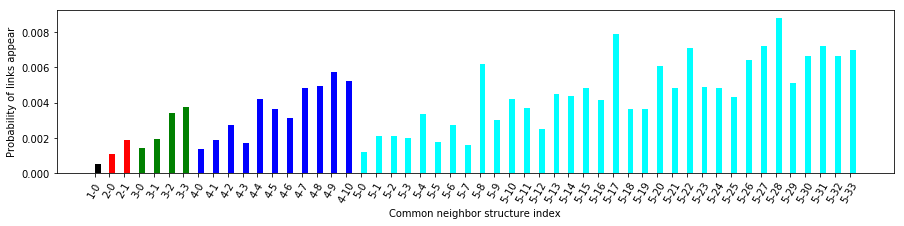

In [9]:
# Fake dataset
height = results_caculate
bars = ('1-0', '2-0', '2-1', '3-0', '3-1', '3-2', '3-3', '4-0', '4-1', '4-2', '4-3', '4-4', '4-5', '4-6', '4-7', '4-8', '4-9','4-10', 
       '5-0', '5-1', '5-2', '5-3', '5-4', '5-5', '5-6', '5-7', '5-8', '5-9', 
        '5-10', '5-11', '5-12', '5-13', '5-14', '5-15', '5-16', '5-17', '5-18', '5-19',
       '5-20', '5-21', '5-22', '5-23', '5-24', '5-25', '5-26', '5-27', '5-28', '5-29',
       '5-30', '5-31', '5-32', '5-33')
colors =['black', 'red', 'red', 'green','green','green', 'green','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue',
         'cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan',
        'cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan','cyan']
y_pos = np.arange(len(bars))
 
# Create bars and choose color
plt.figure(figsize=(15, 3))  # width:20, height:3
plt.bar(y_pos, height, align='edge', width=0.4, color = colors)
 
# Add title and axis names
plt.xlabel('Common neighbor structure index')
plt.ylabel('Probability of links appear')
 
# Create names
plt.xticks(rotation=60)
plt.xticks(y_pos, bars)
 
# Show graphic
# plt.show()
tikz_save("Probabilities.tikz", figureheight='5cm', figurewidth='15cm')

In [29]:
# count case 1-5 happening using real-data
'''
common1 = [0]
common1_appear = [0]
common2 = [0] * 2
common2_appear = [0] * 2
common3 = [0] * 4
common3_appear = [0] * 4
common4 = [0] * 11
common4_appear = [0] * 11
common5 = [0] * 34
common5_appear = [0] * 34

iteration = 0
for n1 in G_train.nodes():
    iteration += 1
    if iteration%100 == 0:
        print(iteration)
    
    nn = neighbors_neighbor(G_train, n1)
    for n2 in nn:
        if (n1 != n2) and ((n1, n2) not in G_train.edges()):
            cn = list(nx.common_neighbors(G_train, n1, n2))
            if len(cn) == 1:
                common1[0] += 1
                if (n1, n2) in G_test.edges():
                    common1_appear[0] += 1
            elif len(cn) == 2:
                g_sub = G_train.subgraph(cn)
                index = nx.number_of_edges(g_sub)
                common2[index] += 1
                if (n1, n2) in G_test.edges():
                    common2_appear[index] += 1
            elif len(cn) == 3:
                g_sub = G_train.subgraph(cn)
                index = nx.number_of_edges(g_sub)
                common3[index] += 1
                if (n1, n2) in G_test.edges():
                    common3_appear[index] += 1
            elif len(cn) == 4:
                g_sub = G_train.subgraph(cn)
                index = G_4_edgeindex[nx.number_of_edges(g_sub)]
                while(nx.is_isomorphic(g_sub, G_4[index]) == False):
                    index += 1
                common4[index] += 1
                if (n1, n2) in G_test.edges():
                    common4_appear[index] += 1
            
            elif len(cn) == 5:
                g_sub = G_train.subgraph(cn)
                index = G_5_edgeindex[nx.number_of_edges(g_sub)]
                while(nx.is_isomorphic(g_sub, G_5[index]) == False):
                    index += 1
                common5[index] += 1
                if (n1, n2) in G_test.edges():
                    common5_appear[index] += 1
                    

print(common1, common1_appear, common2, common2_appear, common3, common3_appear, common4, common4_appear, common5, common5_appear)

# 1 to 3 common neighbors results
result_1 = [common1_appear[i] / common1[i] for i in range(len(common1_appear))] 
result_2 = [common2_appear[i] / common2[i] for i in range(len(common2_appear))] 
result_3 = [common3_appear[i] / common3[i] for i in range(len(common3_appear))] 
result_4 = [common4_appear[i] / common4[i] for i in range(len(common4_appear))] 
result_5 = [common5_appear[i] / common5[i] for i in range(len(common5_appear))] 
results = result_1 + result_2 + result_3 + result_4 + result_5
'''

In [23]:
# kendall-tau rank 
import scipy.stats as ss
x1 = ss.rankdata(actual)
x2 = ss.rankdata(abc)
tau, p_value = ss.kendalltau(x1, x2)
print(tau, p_value)


0.7783611675034265 8.578861365051615e-16
